# Getting Started with OpenCV

This notebook has two main objectives:
1. Getting familiar with OpenCV - its installation and some of its basic usage.
2. Looking at the data we will use - this will give you a lot of context for all the upcoming sessions.

## 1. Familiarisation with OpenCV

OpenCV is a hugely popular image processing library. It is used in a number of image processing applications. A lot of the backend processing of OpenCV is done in C++, which makes it very fast.

Before anything else, we need to install OpenCV.

> ### A. Installing OpenCV



#### For Windows users



- Go to [this website](https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv). It contains the 'wheel files' for several packages, which are present with a .whl extension. Do a Ctrl-F and find the ones for OpenCV.

- Download the .whl file appropriate to your *Python version* and *OS specifications* (most likely, you will be using a Python version greater than 3.4, so use that)

- Navigate to the file where the .whl file is present

- Make sure you have `pip` present on your machine. [This tutorial page](https://pythonprogramming.net/using-pip-install-for-python-modules/) can help you install `pip` if you don't have it.

- Run the following code:

`pip install wheel-name.whl`

- If pip is not present in your PATH variables, you may have to point to where pip is installed:

`C:\Python34\Scripts\Pip install <wheel-name>.whl`



#### For Mac users

- Open Terminal

- Run the following command

`apt-get install python3-OpenCV`


#### For conda installation

If you are running Python via Anaconda, you can run a simple conda install:

`conda install opencv`

In case you want more details, [here is a website](https://pythonprogramming.net/loading-images-python-opencv-tutorial/) that talks about these installations in detail. The link also tells you how to install numpy and matplotlib - most of you already have it, and you don't need to install it again.

> ### B. Importing OpenCV

OpenCV is one of those libraries that is known to have issues in importing.

To ensure that these issues don't happen to you, there's an easy trick. Before importing OpenCV, you can basically point your Jupyter notebook to the correct path where OpenCV is installed.

#### Resolving import issues in OpenCV

Sometimes, it might be that you have two conflicting Python versions (one from a regular install, one from Anaconda). This may cause cv2 to not work. One of the ways to fix this is go to your command line (Terminal for Mac), open Python from there and run these commands:

`import site
site.getsitepackages()`

You will get a list of site packages. Then, run the same commands on Jupyter. If your Terminal site packages has an extra site package location, add it to your site packages with the following commands.

`import sys
sys.path.append('<extra paths found in terminal but not in Jupyter, separated by commas>')`

> ### C. Working with Images using OpenCV

Once you have downloaded OpenCV, you can experiment with images to get a feel for how the library works.

In [2]:
# First, import OpenCV. The Python name for this is 'cv2'
import cv2

In [3]:
# Run these if OpenCV doesn't load
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cv2/')

In [4]:
# Next, import libraries that will aid OpenCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Let's do some basic operations using OpenCV
# Reading an image
img = cv2.imread('../1. Getting Started/vk.jpg')# Please replace this file path by your own file path.
print (img.shape)

(3000, 4000, 3)


This 'img' object becomes the basic object which is manipulated

The cv2.imshow() function is the standard way to show images using cv2.

However, this opens up a new window, which sometimes doesn't work with Jupyter notebooks. 

Hence, the **suggested way with to show images with Jupyter notebooks** is using matplotlib's inline functions. These are demonstrated below.

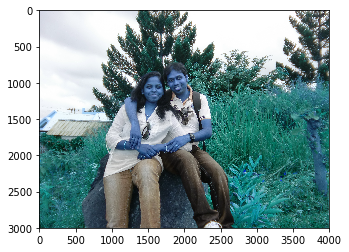

In [5]:
# Using cv2's imshow opens this image in a different window.
# However, the easier and more presentable way to do this is by using matplotlib's inline function
plt.imshow(img)
plt.show()

Let's now move to working with channels and colours. 
As you know, coloured images typically have 3 channels - Red, Green, Blue (RGB). For OpenCV specifically, this ordering of channels is B-G-R. Let's manipulate these images according to their channels.

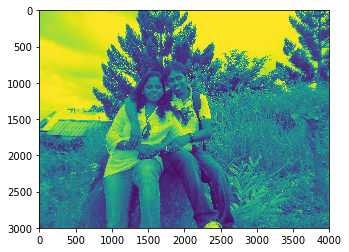

In [6]:
# Now, let's say we want to demonstrate only the green channel out of these
# The ordering of channels in OpenCV is B-G-R. 0 is Blue, 1 is Green, 2 is Red.
plt.imshow(img[:,:,1])

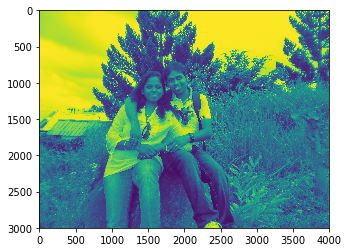

In [7]:
# This image is a colour image. We can easily convert this image to gray.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

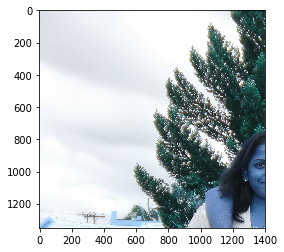

In [9]:
# Next, we can access specific parts of the image using coordinates
bearface = img[100:1450, 150:1550]
plt.imshow(bearface)

> ### D. Drawing on Images using OpenCV

In [10]:
# Drawing a line

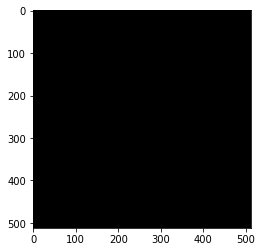

In [11]:
# First, create a black image as background
img_black = np.zeros((512,512,3), np.uint8)

plt.imshow(img_black)

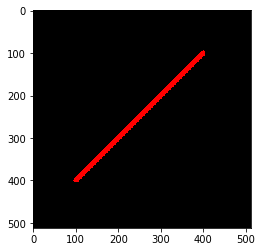

In [12]:
# Then, we can draw objects on this image
cv2.line(img_black,(400,100),(100,400),(255,0,0),10)

# Display this
plt.imshow(img_black)
plt.show()

## 2. Introduction to data

Now that you know your way around OpenCV a little bit, let's try reading the data that we'll use for this demo.

> ### A. Reading Video data

During this demonstration, we will be using a video taken in the city of Pune. It is taken from a high-rise building. You can see the stream of traffic from the camera.


You can download the data file from this location:
<font color = red> ADD DATA LINK HERE </font>

Once you have downloaded the video, you can read it using OpenCV

In [13]:
# Run opencv video capture

cap = cv2.VideoCapture('../AundhBridge.mp4')

Once you have read the data file, the next step is to "play" the video using OpenCV. The cell below tells you how to do this.

In [14]:
# 'Playing' the video using OpenCV

# This while loop keeps executing till the 'cap' object is in an 'open' state
while(cap.isOpened()):

    # We then use the cap.read() function, which returns two values
    ret, frame = cap.read()
    
    # This is a sanity check where if the video is not present, we break out of the loop
    
    if frame is None:
        break

    # This line of code converts the video into a gray image. We do this to speed up processing.
    # You can skip this line by commenting it out
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Finally, we use cv2.imshow() to show the image
    cv2.imshow('frame',gray) 
    # If you have skipped the previous line defining 'gray', then use the 'frame' variable in the above line
    
    # Now, this section deals with shutting down the video.
    # The logic is, if either the Escape key or the letter 'q' is pressed, we break out of the loop.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Subsequently, we close the video object.         
cap.release()
cv2.destroyAllWindows() 

### Graded Q

In [5]:
img = cv2.imread('../1. Getting Started/Gita.jpg')# Please replace this file path by your own file path.
print (img.shape)

(400, 400, 3)


(400, 400)


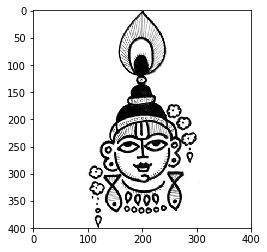

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
print(img_gray.shape)

In [8]:
sigma = 5

In [26]:
noise=np.random.randn(img_gray.shape[0],img_gray.shape[1])*sigma

In [27]:
# noise = noise *sigma

In [28]:
img_gray2 = img_gray + noise 

(400, 400)


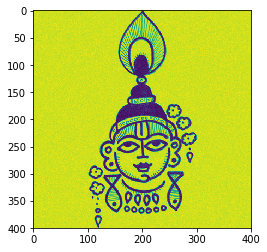

In [29]:
plt.imshow(img_gray2)
print(img_gray2.shape)

In [30]:
img_res = cv2.GaussianBlur(img_gray2,(5,5),0)

(400, 400)


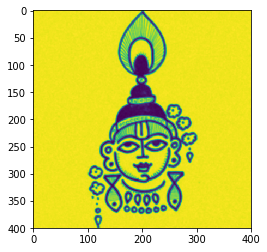

In [31]:
plt.imshow(img_res)
print(img_res.shape)

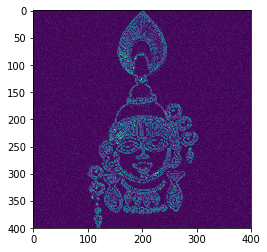

In [33]:
imgDiff = cv2.absdiff(img_res, img_gray2) 

plt.imshow(imgDiff)